<a href="https://colab.research.google.com/github/hugoaraoz/python-ciencia-datos/blob/main/TPFINAL_Hugo_araoz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP FINAL

**Ejercicio 1**

Buscar un dataset (Que no sea los trabajados en clases)

**Ejercicio 2**

Realizar una introduccion al dataset de que se trata,definir sus variables (Diccionario de datos)

**Ejercicio 3**

Identificar el tipo de variable,decide justificando su respuesta.

**Ejercicio 4**

Detectar Valores Ausente y Valores Atipicos .Decidir si eliminarlos y el por que de la eleccion.

**Ejercicio 5**

Realizar un analisis univariado y en base a esos graficos,sacar conclusiones.

**Ejercicio 6**

Realizar analisis de matriz corelacion y explicar que variable estan correlacionadas\

In [37]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans




url = "https://raw.githubusercontent.com/hugoaraoz/python-ciencia-datos/main/argentina.csv"
df = pd.read_csv(url)
df.head()

,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
0,Buenos Aires,2.926899e+08,1.38324,8.167798,5.511856,0.766168,48.7947,4.4,15625084,0.000006,0.004836
1,Catamarca,6.150949e+06,2.34414,9.234095,10.464484,0.951963,45.0456,1.5,367828,0.000005,0.004502
2,Córdoba,6.936374e+07,2.71414,5.382380,10.436086,1.035056,45.7640,4.8,3308876,0.000011,0.010175
3,Corrientes,7.968013e+06,5.60242,12.747191,17.438858,3.864265,62.1103,5.9,992595,0.000004,0.004495
4,Chaco,9.832643e+06,7.51758,15.862619,31.479527,2.577462,65.5104,7.5,1055259,0.000003,0.003605


**Diccionario de datos**

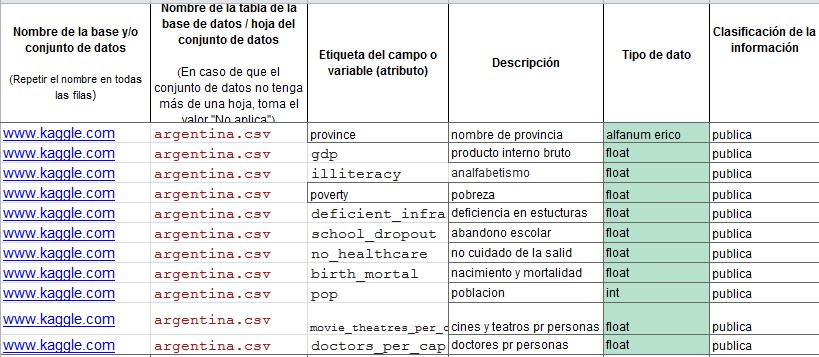

provincia (variables discretas.)
producto interno bruto( cuantitativa continua)

1.   Elemento de lista

*   province(cualitativas nominales)
*   gdp   (cuantitativa continua)
*   illiteracy (cuantitativa continua)
*   poverty  (cuantitativa continua)
*   deficient_infra (cuantitativa continua)
*   scholl_dropout (cuantitativa continua)
*   no_healthcare (cuantitativa continua)
*   birth_mortal (cuantitativa continua)
*   pop (cuantitativa discreta)
*   movie_theatres_per_cap (cuantitativa continua)
*   doctors_per_cap (cuantitativa continua)




















In [38]:
df.shape

(22, 11)

In [39]:
# Obtener información básica sobre el conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   province                22 non-null     object 
 1   gdp                     22 non-null     float64
 2   illiteracy              22 non-null     float64
 3   poverty                 22 non-null     float64
 4   deficient_infra         22 non-null     float64
 5   school_dropout          22 non-null     float64
 6   no_healthcare           22 non-null     float64
 7   birth_mortal            22 non-null     float64
 8   pop                     22 non-null     int64  
 9   movie_theatres_per_cap  22 non-null     float64
 10  doctors_per_cap         22 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 2.0+ KB


In [40]:
# Manejo de valores atípicos
# Obtener estadísticas descriptivas
df.describe()

,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
count,2.200000e+01,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01,22.000000,22.000000
mean,3.055703e+07,3.225541,9.925625,12.677304,1.724866,50.768836,4.986364,1.686352e+06,0.000007,0.004894
std,6.183100e+07,1.851496,3.779530,7.216860,1.152438,9.181037,3.498339,3.219828e+06,0.000004,0.001522
min,3.807057e+06,0.791485,3.398774,3.839852,0.204093,29.232100,0.800000,2.739640e+05,0.000002,0.002821
25%,8.041587e+06,1.989810,7.472754,7.569677,0.812617,45.548300,3.025000,5.143715e+05,0.000004,0.004061
50%,1.096416e+07,2.743675,9.142440,10.865881,1.437767,49.370500,4.000000,7.775305e+05,0.000006,0.004757
75%,1.999452e+07,3.686190,12.500143,16.100647,2.514496,56.915800,5.875000,1.230606e+06,0.000009,0.005334
max,2.926899e+08,7.517580,17.035583,31.479527,3.864265,65.812600,16.200000,1.562508e+07,0.000019,0.010175


In [41]:
# Obtener el número de valores faltantes en cada columna
df.isnull().sum()

province                  0
gdp                       0
illiteracy                0
poverty                   0
deficient_infra           0
school_dropout            0
no_healthcare             0
birth_mortal              0
pop                       0
movie_theatres_per_cap    0
doctors_per_cap           0
dtype: int64

no posee datos nulos

In [42]:
df.head(10)

,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
0,Buenos Aires,2.926899e+08,1.38324,8.167798,5.511856,0.766168,48.7947,4.4,15625084,0.000006,0.004836
1,Catamarca,6.150949e+06,2.34414,9.234095,10.464484,0.951963,45.0456,1.5,367828,0.000005,0.004502
2,Córdoba,6.936374e+07,2.71414,5.382380,10.436086,1.035056,45.7640,4.8,3308876,0.000011,0.010175
3,Corrientes,7.968013e+06,5.60242,12.747191,17.438858,3.864265,62.1103,5.9,992595,0.000004,0.004495
4,Chaco,9.832643e+06,7.51758,15.862619,31.479527,2.577462,65.5104,7.5,1055259,0.000003,0.003605
5,Chubut,1.774785e+07,1.54806,8.051752,8.044618,0.586309,39.5473,3.0,509108,0.000016,0.004498
6,Entre Ríos,2.074341e+07,3.18558,7.288751,18.794568,1.887188,48.6571,3.1,1235994,0.000006,0.004679
7,Formosa,3.807057e+06,4.61064,17.035583,28.004985,2.268974,65.8126,16.2,530162,0.000004,0.003440
8,Jujuy,6.484938e+06,2.15139,13.367965,12.483179,0.721295,54.1615,3.7,673307,0.000003,0.003958
9,La Pampa,6.990262e+06,1.53930,3.398774,16.505714,0.204093,45.4764,7.2,318951,0.000019,0.005415


<Axes: >

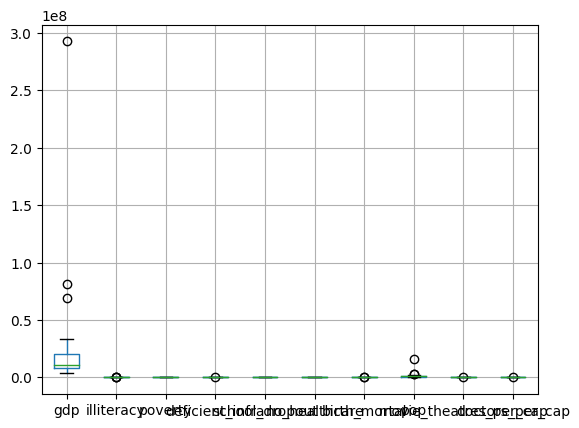

In [43]:
df.boxplot()

<Axes: >

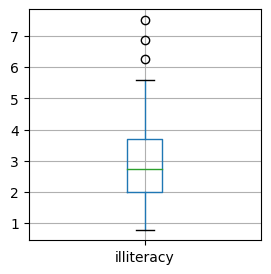

In [45]:

plt.figure(figsize=(3,3))
df.boxplot('illiteracy')



la distribucion de los datos tinen un asimetria positiva y valores atipicos

<Axes: >

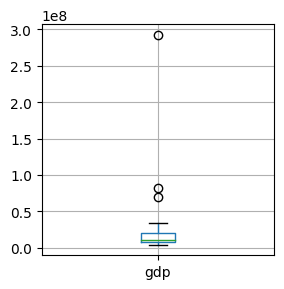

In [47]:
plt.figure(figsize=(3,3))
df.boxplot('gdp')

la distribucion de los datos tinen un asimetria positiva y valores atipicos

<Axes: >

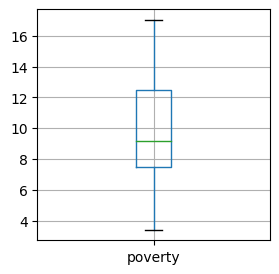

In [48]:
plt.figure(figsize=(3,3))
df.boxplot('poverty')

la distribucion de los datos tinen un asimetria positiva

<Axes: >

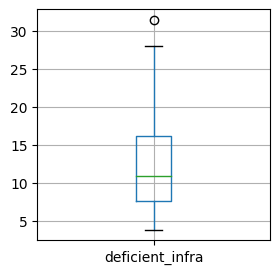

In [49]:
plt.figure(figsize=(3,3))
df.boxplot('deficient_infra')


la distribucion de los datos tinen un asimetria positiva y

<Axes: >

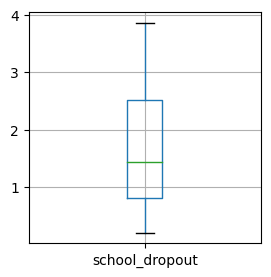

In [50]:
plt.figure(figsize=(3,3))
df.boxplot('school_dropout')

la distribucion de los datos tinen un asimetria positiva

<Axes: >

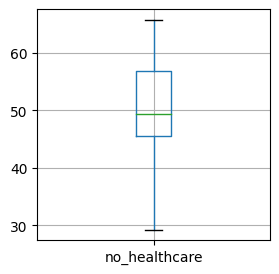

In [51]:
plt.figure(figsize=(3,3))
df.boxplot('no_healthcare')

la distribucion de los datos tinen un asimetria positiva

<Axes: >

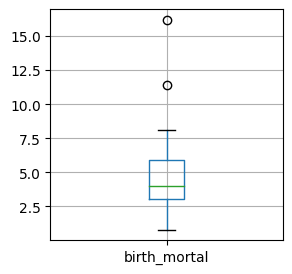

In [52]:
plt.figure(figsize=(3,3))
df.boxplot('birth_mortal')

la distribucion de los datos tinen un asimetria positiva y valores atipicos

<Axes: >

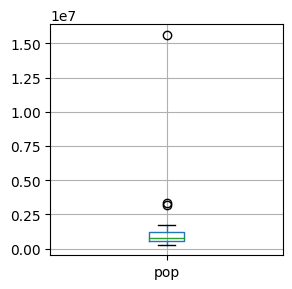

In [53]:
plt.figure(figsize=(3,3))
df.boxplot('pop')

la distribucion de los datos tinen un asimetria positiva y valores atipicos

<Axes: >

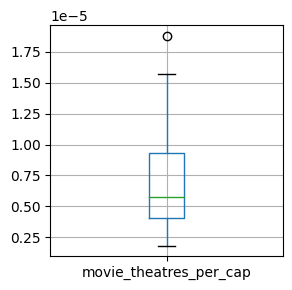

In [54]:
plt.figure(figsize=(3,3))
df.boxplot('movie_theatres_per_cap')

la distribucion de los datos tinen un asimetria positiva y valores atipicos

<Axes: >

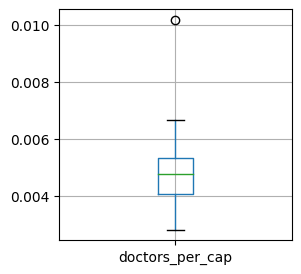

In [55]:
plt.figure(figsize=(3,3))
df.boxplot('doctors_per_cap')

la distribucion de los datos tinen un asimetria negativa y valores atipicos

In [57]:
#se define una función para generar y limpiar los outliers
def detect_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 0.5 * iqr
    upper_bound = q3 + 0.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

    # Llamamos a la función para cada columna numérica donde desees detectar outliers
columns_to_check = ["gdp"]
outliers_list = []
for col in columns_to_check:
    outliers = detect_outliers_iqr(df, col)
    outliers_list.append(outliers)

# Concatenamos todos los outliers encontrados en un solo DataFrame
outliers_df = pd.concat(outliers_list)

# Eliminamos los outliers del conjunto de datos original
df_cleaned1 = df.drop(outliers_df.index)

# Imprimimos la cantidad de outliers detectados
print("Número de outliers detectados:", len(outliers_df))
print(outliers)

Número de outliers detectados: 4
        province           gdp  illiteracy   poverty  deficient_infra  \
0   Buenos Aires  2.926899e+08     1.38324  8.167798         5.511856   
2        Córdoba  6.936374e+07     2.71414  5.382380        10.436086   
11       Mendoza  3.343137e+07     2.20020  5.692798         3.839852   
19      Santa Fe  8.158869e+07     1.97594  6.081012        11.869195   

    school_dropout  no_healthcare  birth_mortal       pop  \
0         0.766168        48.7947           4.4  15625084   
2         1.035056        45.7640           4.8   3308876   
11        1.063718        50.5843           4.4   1738929   
19        2.872181        41.9660           2.6   3194537   

    movie_theatres_per_cap  doctors_per_cap  
0                 0.000006         0.004836  
2                 0.000011         0.010175  
11                0.000008         0.005720  
19                0.000007         0.006672  


<Axes: >

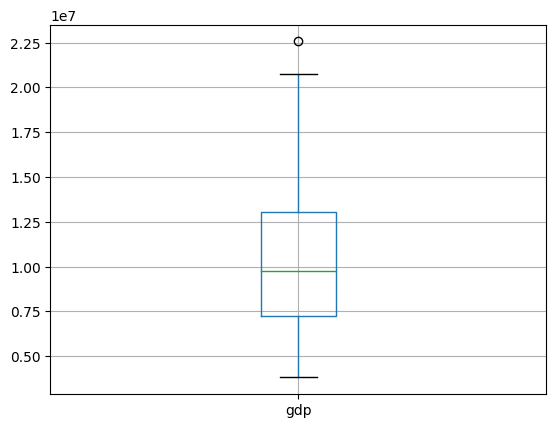

In [58]:
df_cleaned1.boxplot('gdp')

<Axes: >

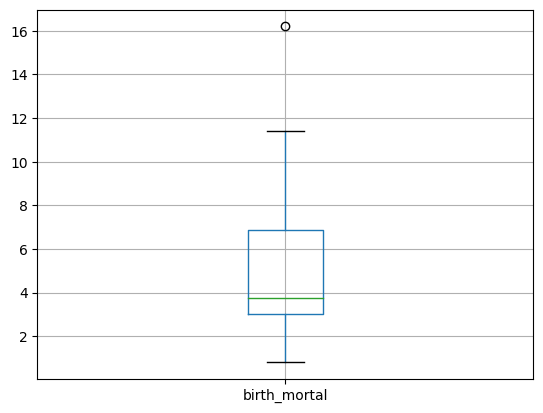

In [59]:
df_cleaned1.boxplot('birth_mortal')

<Axes: >

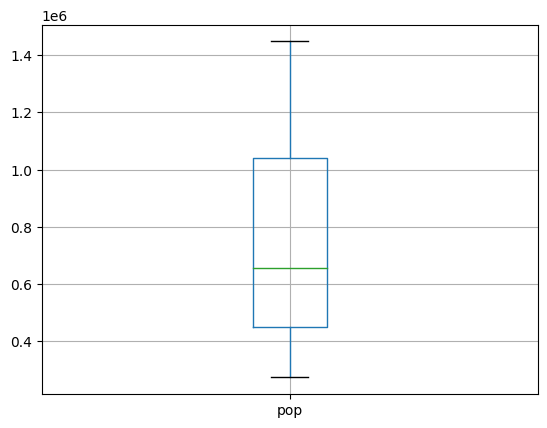

In [60]:
df_cleaned1.boxplot('pop')

<Axes: >

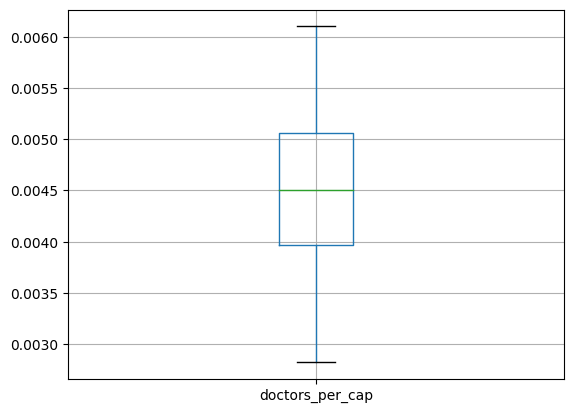

In [61]:
df_cleaned1.boxplot('doctors_per_cap')

In [67]:
# lista de todas las caracteristicas
features_orig = ['gdp', 'illiteracy', 'poverty', 'deficient_infra',
                 'school_dropout', 'no_healthcare', 'birth_mortal', 'pop',
                 'movie_theatres_per_cap', 'doctors_per_cap']

**diagrama de barras de todas las características**

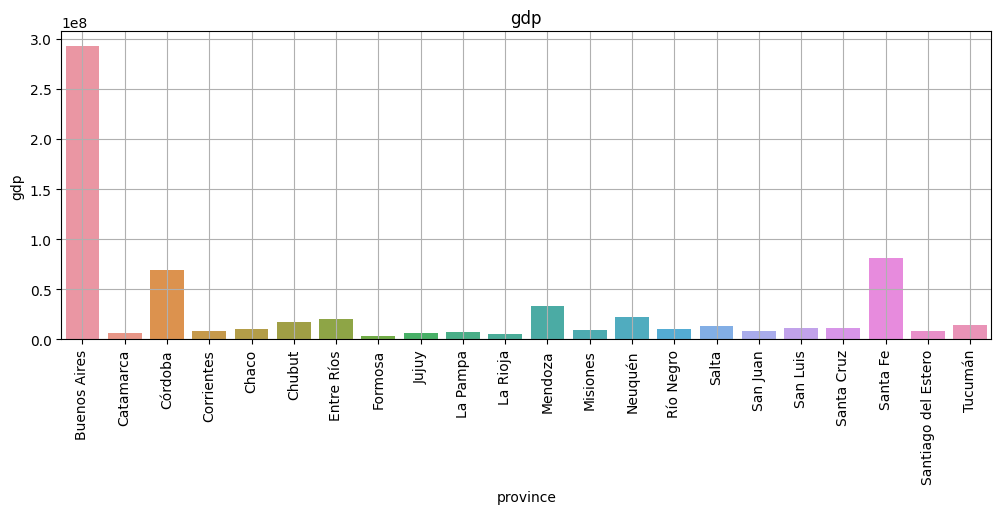

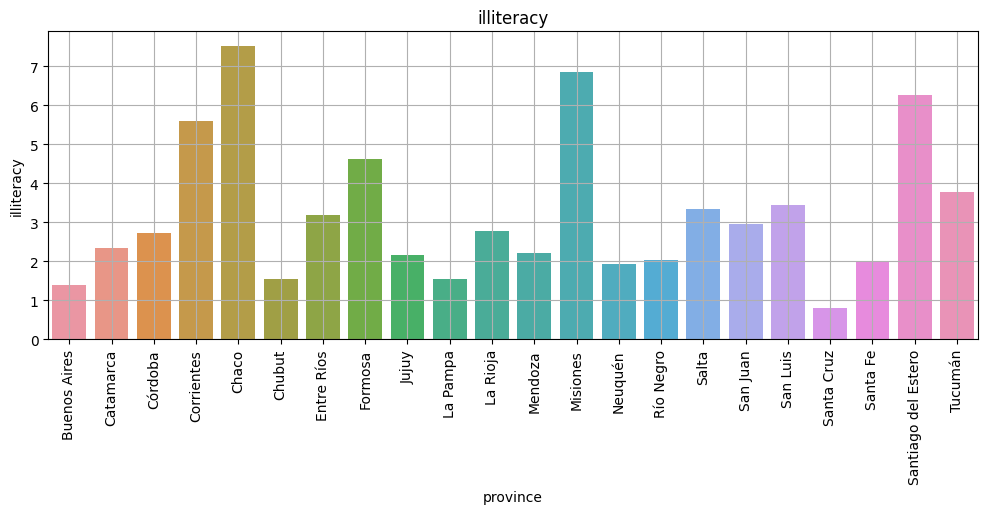

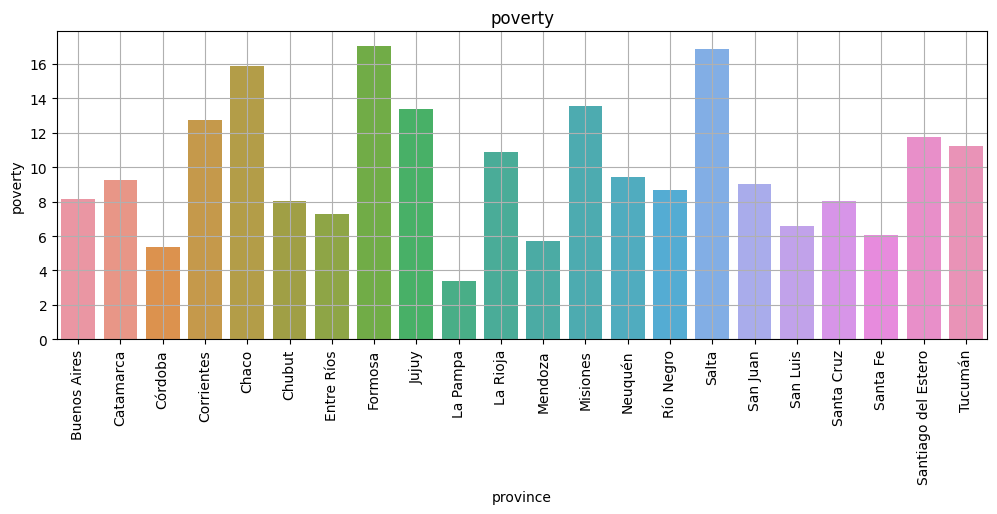

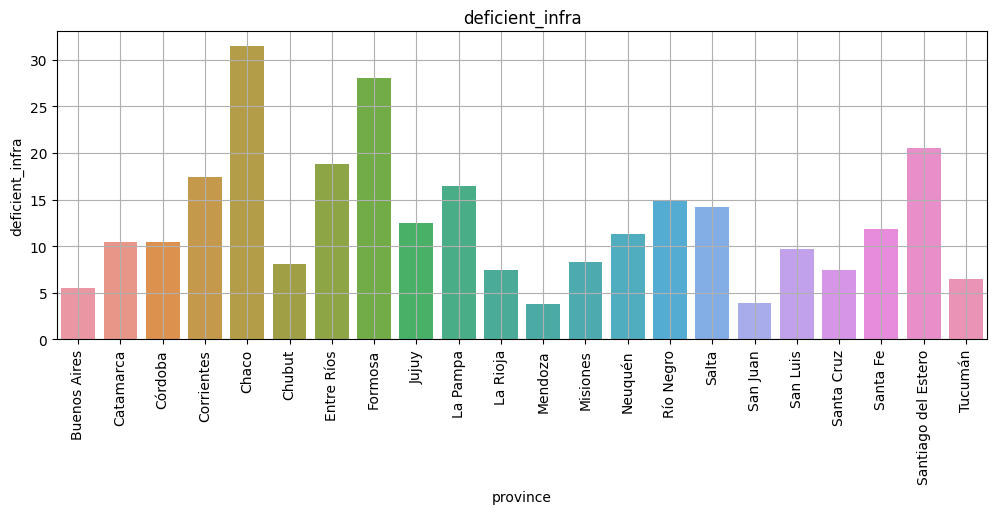

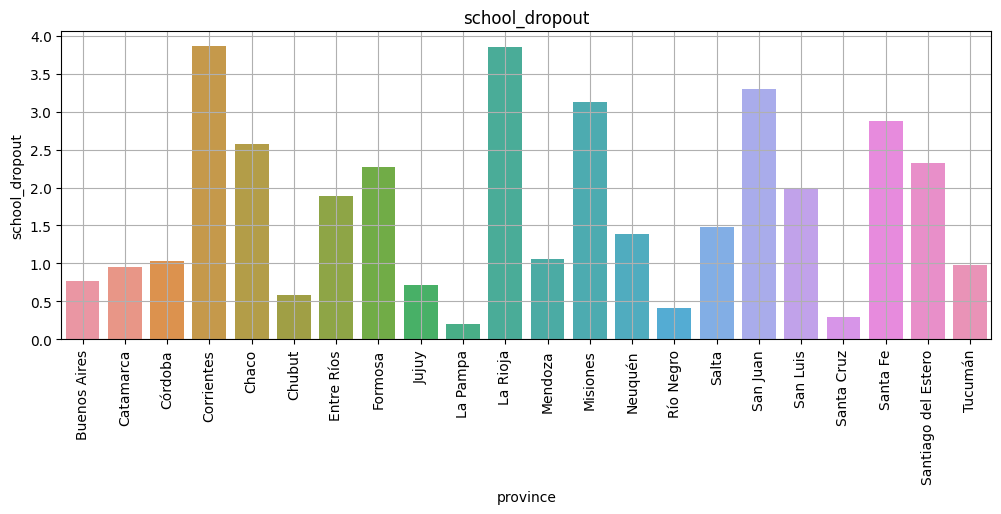

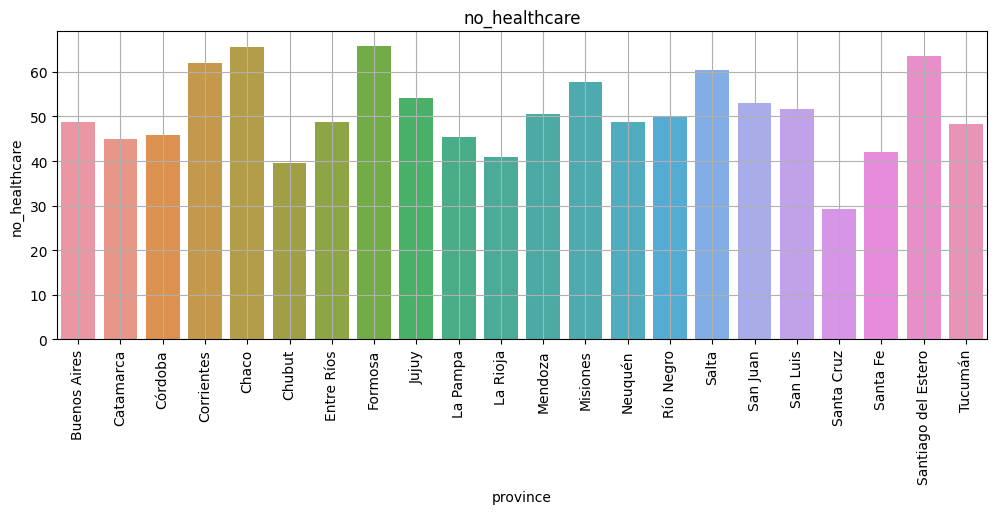

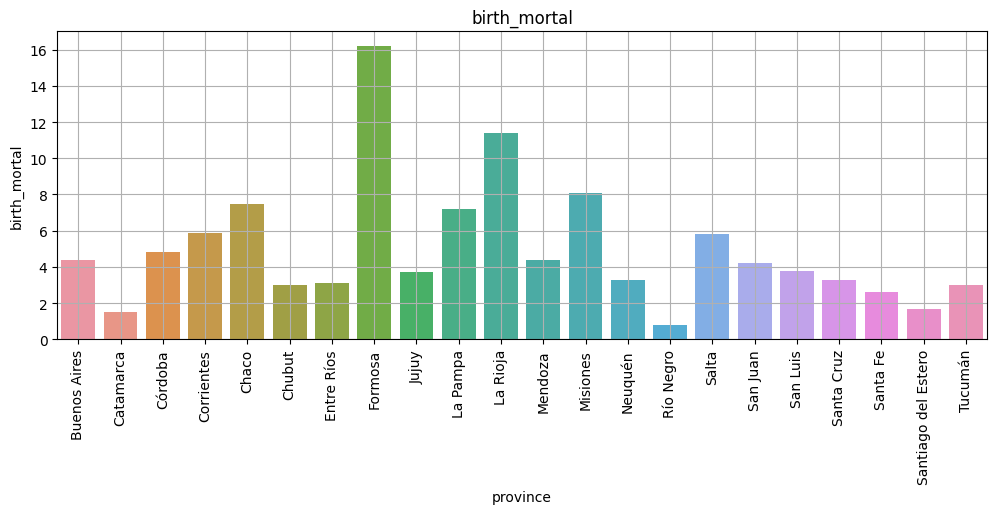

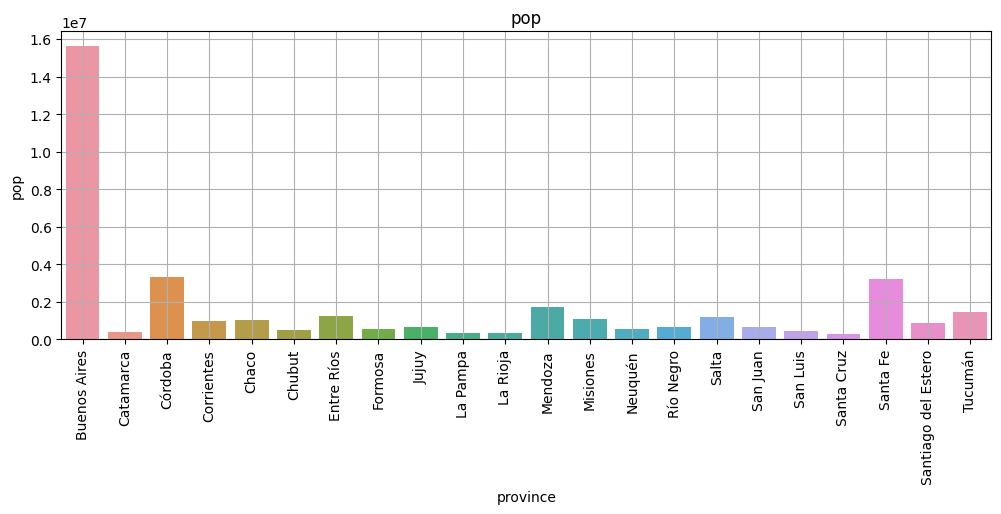

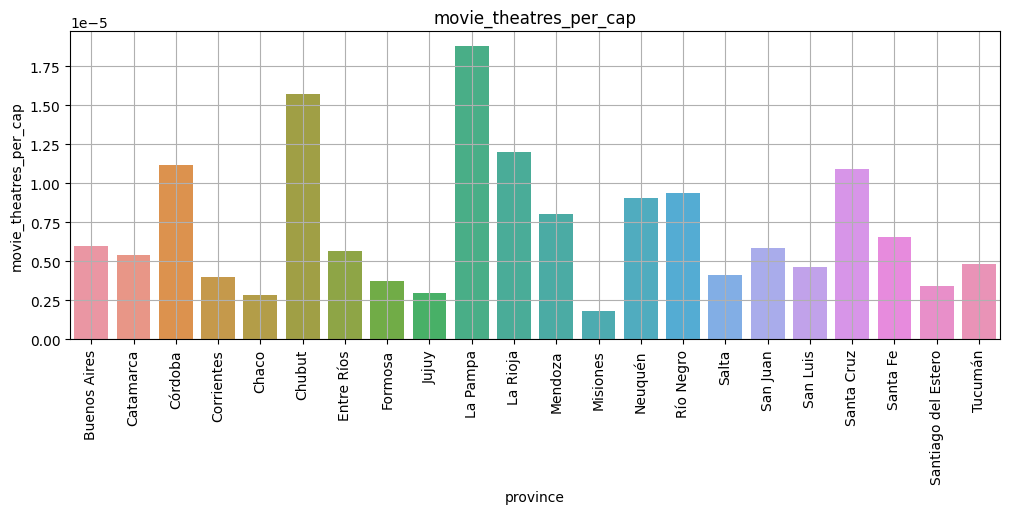

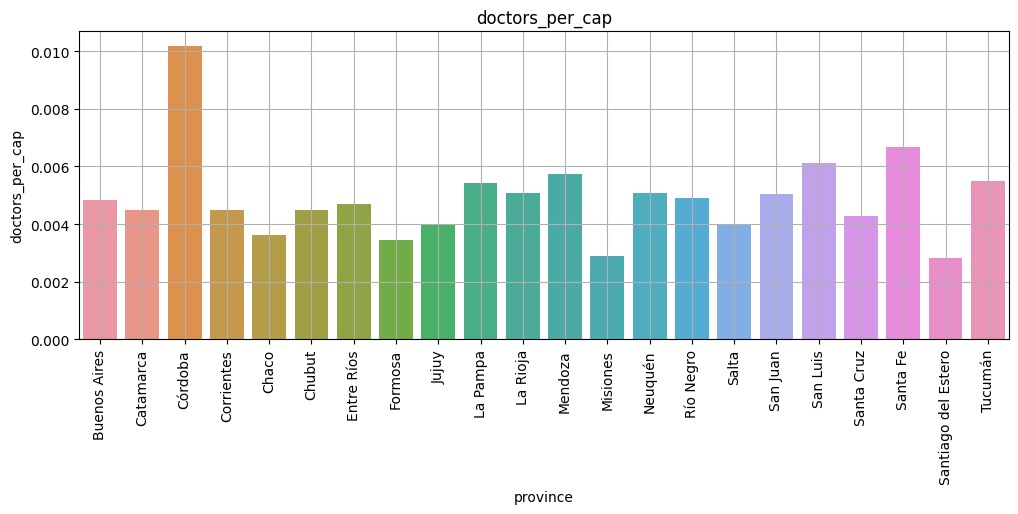

In [68]:

for f in features_orig:
    fig = plt.figure(figsize = (12,4))
    sns.barplot(x='province', y=f, data=df)
    plt.xticks(rotation=90)
    plt.grid()
    plt.title(f)
    plt.show()

** Análisis multivariado**


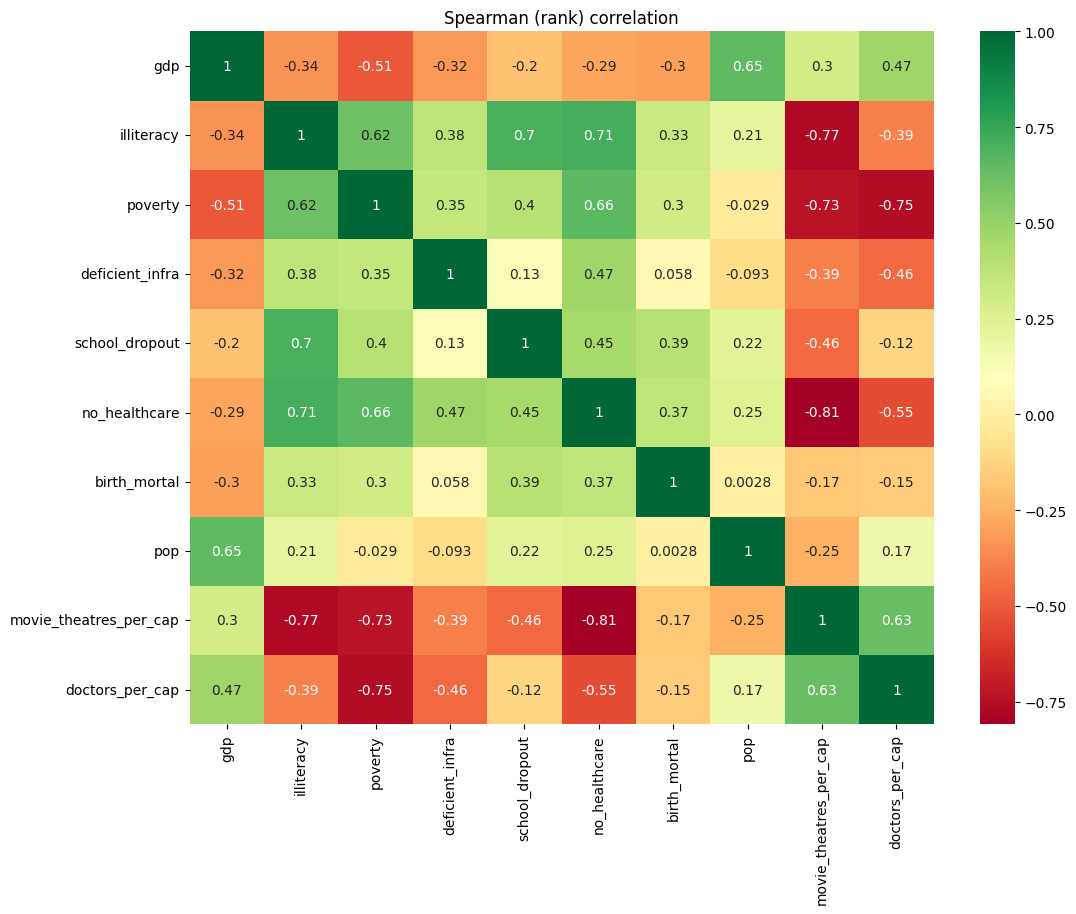

In [71]:
# matriz Correlación
corr_mat = df[features_orig].corr(method='spearman')
# plot  correlation matrix
fig = plt.figure(figsize = (12,9))
sns.heatmap(corr_mat, annot=True, cmap="RdYlGn")
plt.title('Spearman (rank) correlation')
plt.show()

podemos ver que la pobreza, el analfabetismo, el poco cuidado de la salud, tienen una fuerte correlación positiva de 0,6. Esto significa que las personas de escasos recursos no opuede cuidar su salud como coresponde y tiene un bajo nivel educativo.

Que el analfabetismo se relaciona con el abandono escolar

la relacion que tiene el producto bruto interno con la poblacion que refleja la evolución económica

y las variables con correlación negativa indica que  se mueven en direcciones opuestas

**Para los que entregan en blanco**

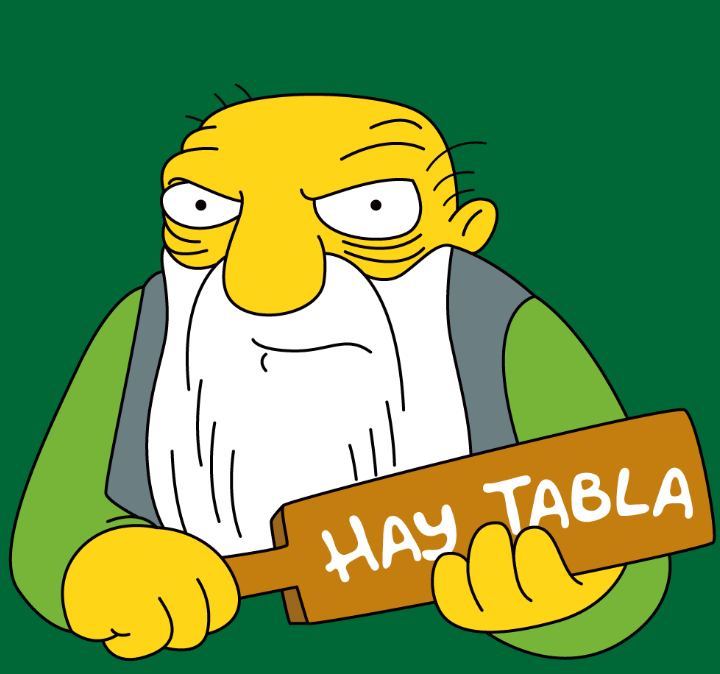